In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from scipy.ndimage import zoom


class image_unit:
    def __init__(self) -> None:
        self.num_of_points = 0
        self.cord_of_points = []
        self.raw_image = []
    def print_data(self) -> None:
        print(self.num_of_points)
        print(self.cord_of_points)
        print(self.raw_image)
        # Plotting the array as a grayscale image
        plt.imshow(self.raw_image, cmap='viridis')
        plt.colorbar()  # Adding a colorbar to show intensity scale
        plt.title('Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()
    def update_raw_image_with_bicubic(self, zoom_factor: float) -> None:
        self.raw_image = zoom(self.raw_image, zoom=zoom_factor, order=3)  # Bicubic interpolation

# 反卷积网络
class DeconvolutionNetwork(nn.Module):
    def __init__(self):
        super(DeconvolutionNetwork, self).__init__()
        self.deconv1 = nn.ConvTranspose2d(1, 1, 3, stride=1, padding=1)
        self.deconv2 = nn.ConvTranspose2d(1, 1, 3, stride=1, padding=1)
        self.deconv3 = nn.ConvTranspose2d(1, 1, 3, stride=1, padding=1)
    
    def forward(self, x):
        x = self.deconv1(x)
        x = self.deconv2(x)
        x = self.deconv3(x)
        return x
def apply_deconvolution(image, deconv_net, threshold=0.99):
    """
    对给定图像应用反卷积处理。
    
    参数：
    image -- 需要处理的图像 (numpy数组)
    deconv_net -- 反卷积网络模型 (nn.Module)
    threshold -- 小于此值的元素将被设为0 (float)

    返回：
    处理后的图像 (numpy数组)
    """
    # 将图像转换为torch张量并添加批次和通道维度 (假设输入图像是灰度图，所以有1个通道)
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # 应用反卷积网络
    deconv_image_tensor = deconv_net(image_tensor)
    # 去掉批次和通道维度，并转换回numpy数组
    deconv_image = deconv_image_tensor.squeeze(0).squeeze(0).detach().numpy()
    # 应用阈值处理
    deconv_image[deconv_image < threshold] = 0
    return deconv_image

10.0
[[4.90713265801572, 28.039538291703874], [32.84440350822294, 13.578512105334035], [52.973610967129076, 13.170954812016848], [6.088365442640924, 8.067917290512826], [16.436996322861567, 10.291193687624183], [51.67877819316273, 59.35360808253424], [30.56994401674475, 52.702905728831574], [20.15551056223808, 48.038847909050986], [41.31064392120531, 7.420266202730436], [22.67208069830488, 19.913075159064046]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 8.0, 18.0, 34.0, 8.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

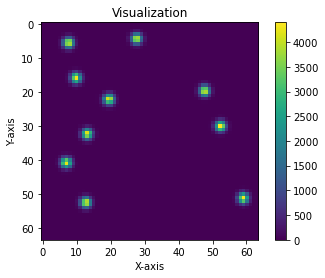

10.0
[[4.90713265801572, 28.039538291703874], [32.84440350822294, 13.578512105334035], [52.973610967129076, 13.170954812016848], [6.088365442640924, 8.067917290512826], [16.436996322861567, 10.291193687624183], [51.67877819316273, 59.35360808253424], [30.56994401674475, 52.702905728831574], [20.15551056223808, 48.038847909050986], [41.31064392120531, 7.420266202730436], [22.67208069830488, 19.913075159064046]]
[[-4.66333460e-20  4.98484773e-16  3.11640863e-17 ... -3.08985168e-21
  -4.94376269e-20 -1.28776216e-32]
 [-4.09114758e-20 -1.56113127e-05 -9.75707042e-07 ...  1.94969199e-18
   3.11950718e-17  1.73719000e-29]
 [-7.32511059e-21 -3.41556497e-05 -2.13472811e-06 ...  1.73983707e-19
   2.78373932e-18  1.08477859e-30]
 ...
 [-6.64837285e-26  1.10792572e-11  6.92453576e-13 ...  8.43011031e-07
   3.72059678e-07 -2.20648628e-08]
 [-1.38475517e-25  1.77268116e-10  1.10792572e-11 ...  1.34881765e-05
   5.95295486e-06 -3.53037804e-07]
 [-1.62048407e-26 -2.64809269e-25 -1.20755949e-25 ... -2

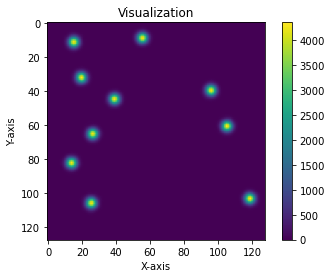

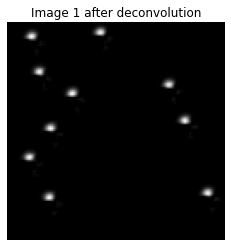

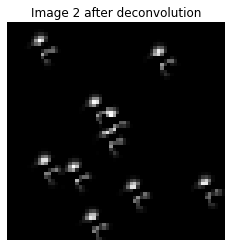

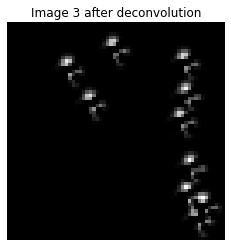

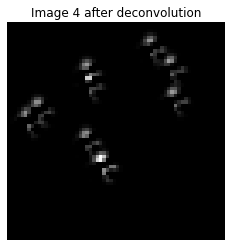

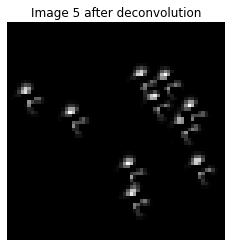

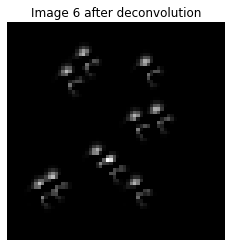

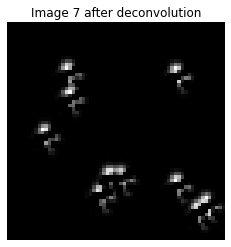

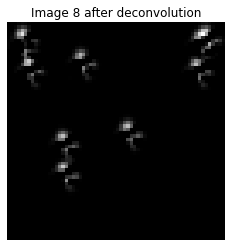

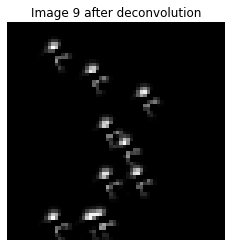

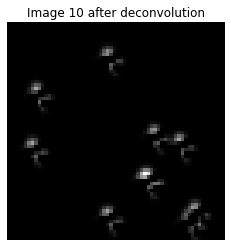

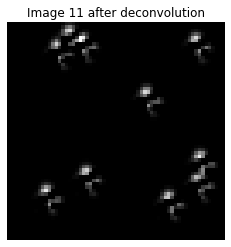

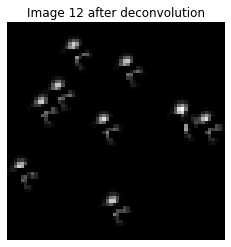

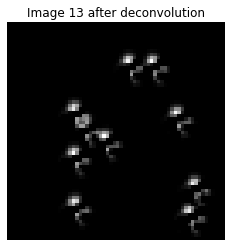

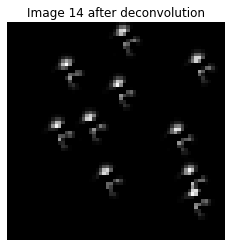

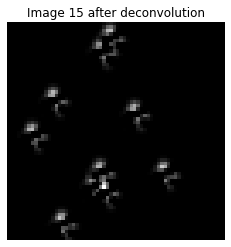

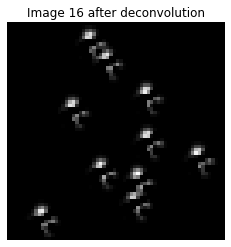

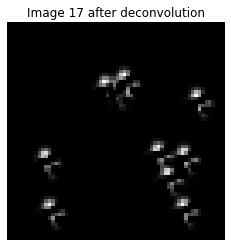

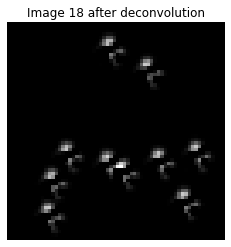

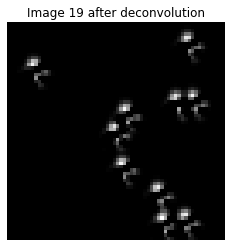

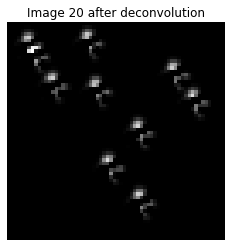

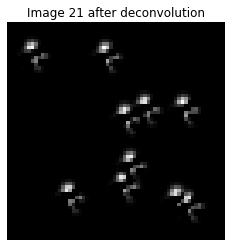

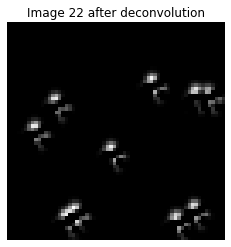

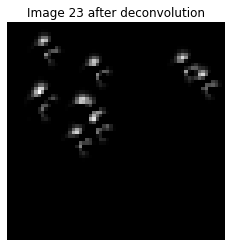

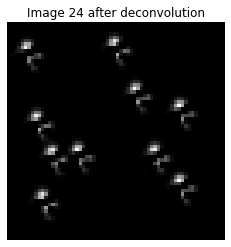

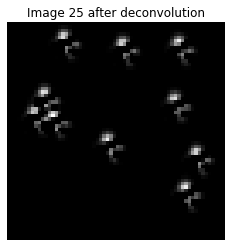

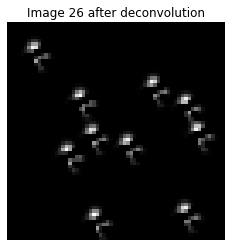

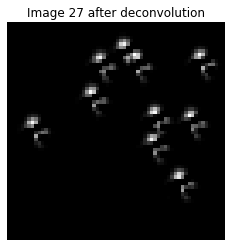

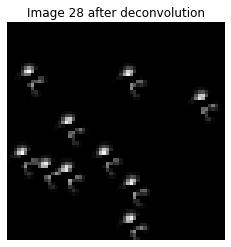

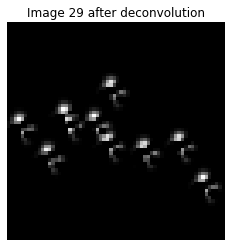

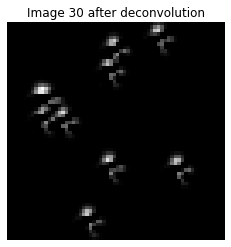

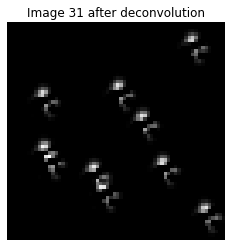

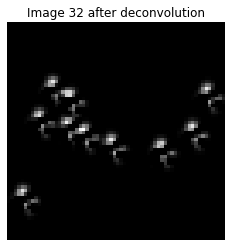

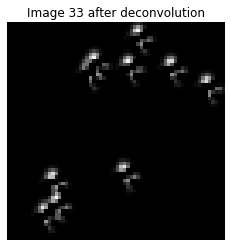

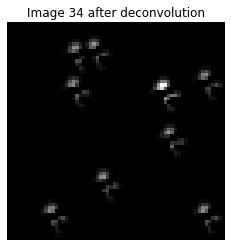

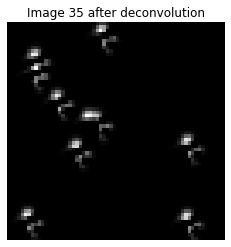

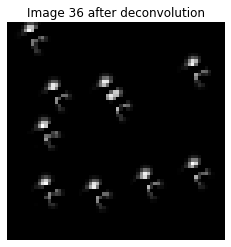

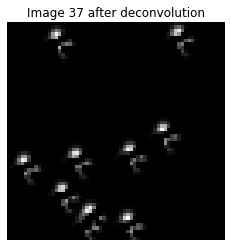

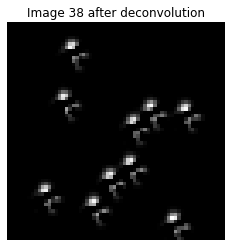

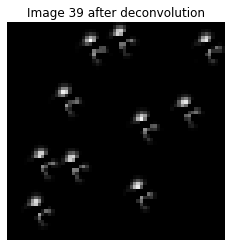

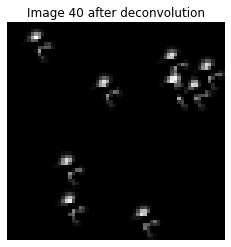

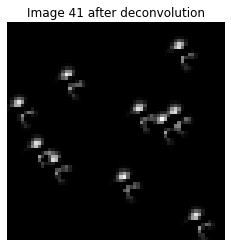

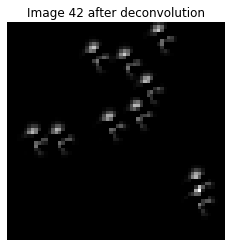

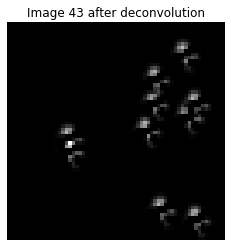

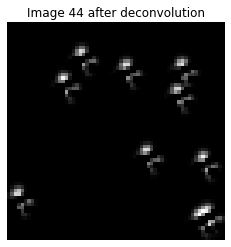

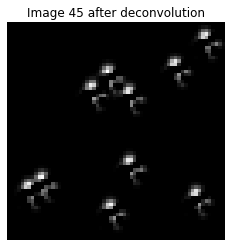

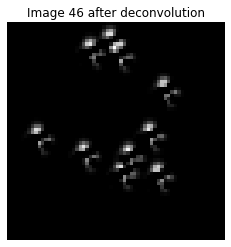

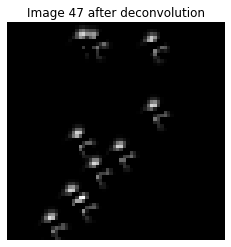

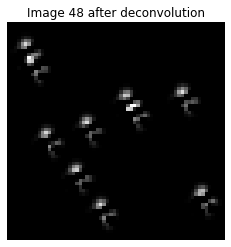

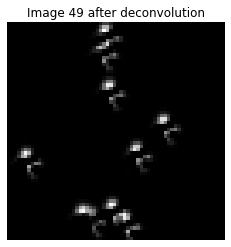

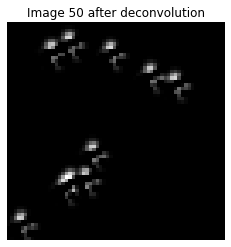

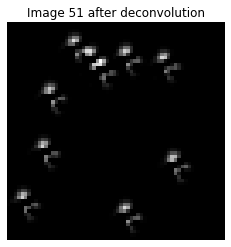

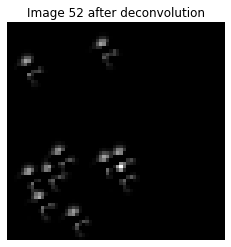

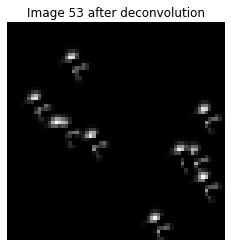

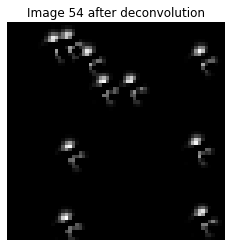

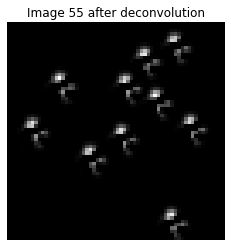

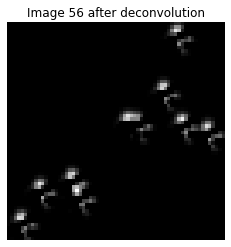

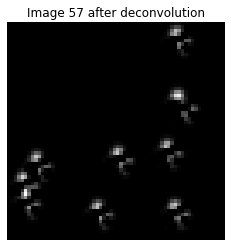

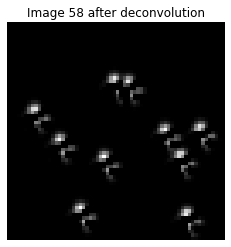

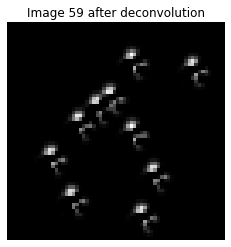

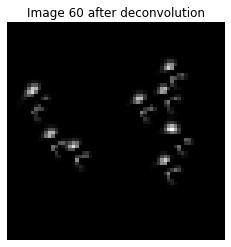

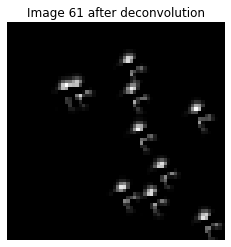

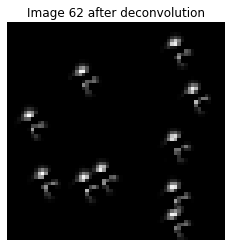

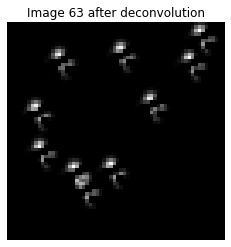

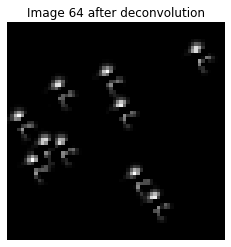

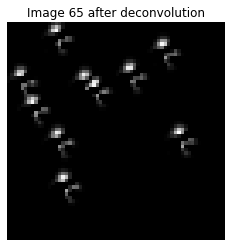

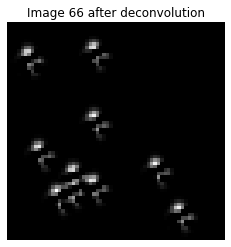

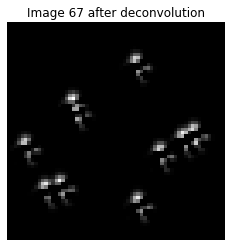

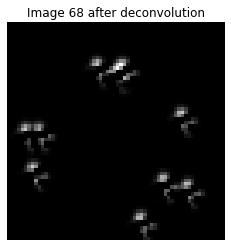

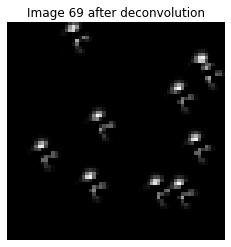

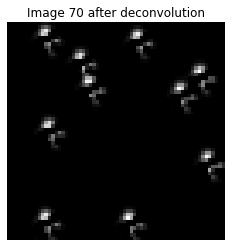

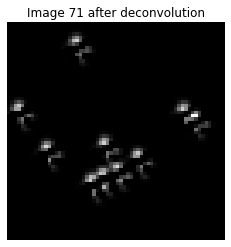

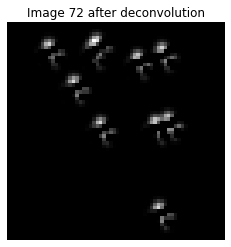

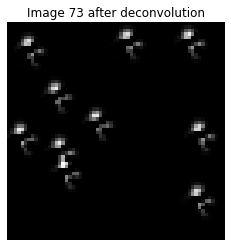

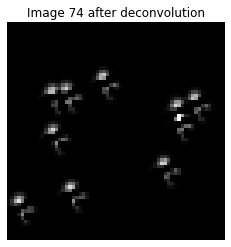

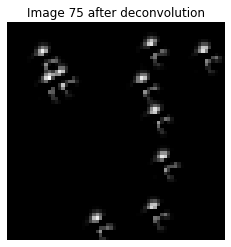

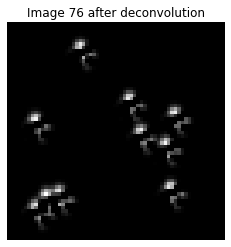

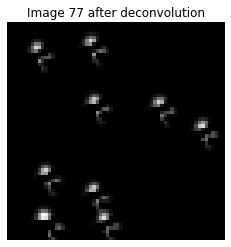

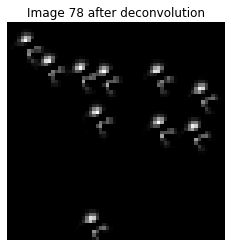

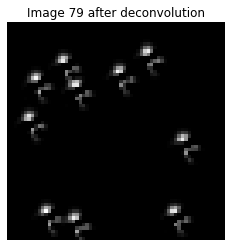

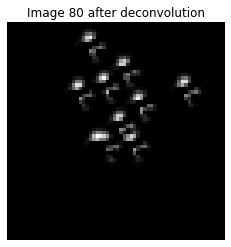

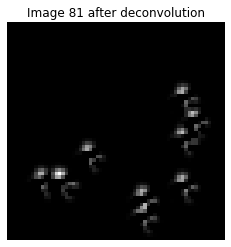

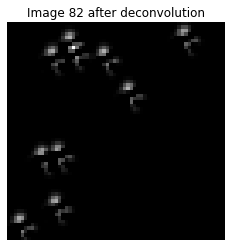

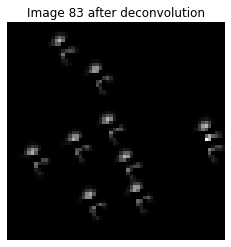

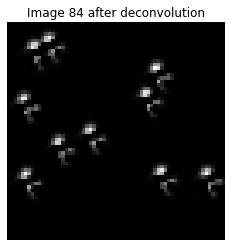

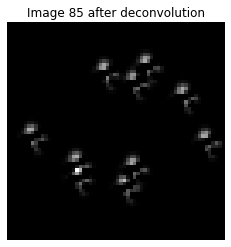

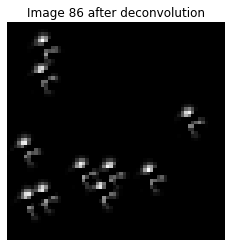

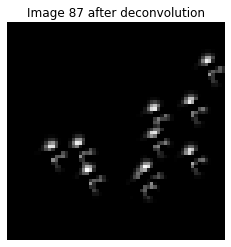

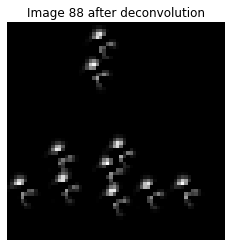

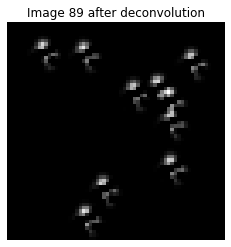

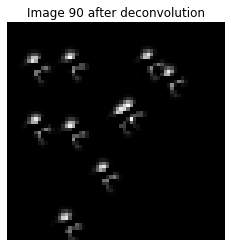

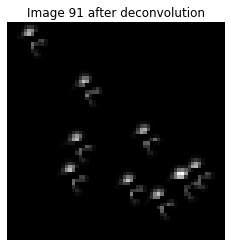

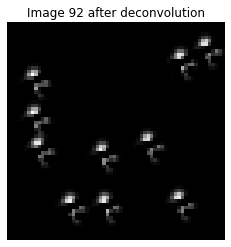

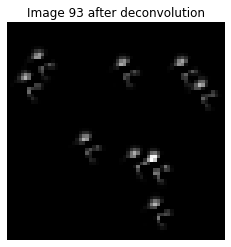

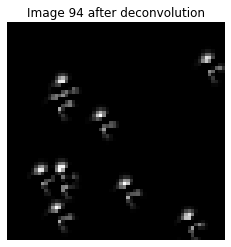

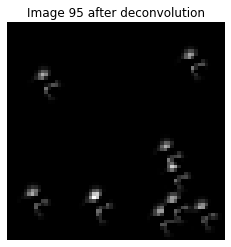

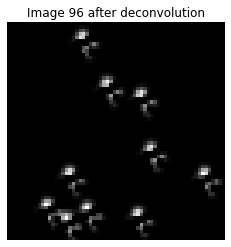

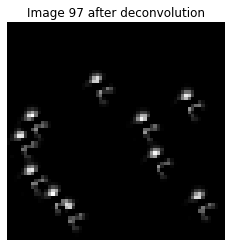

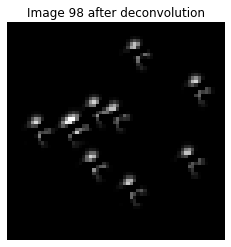

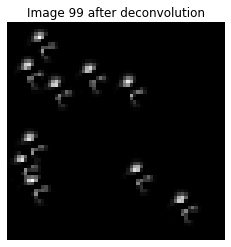

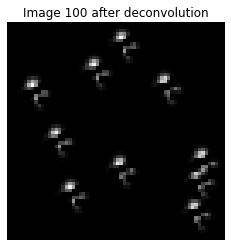

In [2]:
# Specify the path to your text file
file_path = './Clusters_2D_100.txt'
images = []
deconv_net = DeconvolutionNetwork()

# For every image:
# Line 1: number of clusters(10)
# Line 2-11: exact positions of the points
# Others: grayscale image
with open(file_path, 'r') as file:
    for line in file:
        numbers = []
        numbers = [float(s) for s in line.strip().split()]
        if len(numbers) == 1:
            images.append(image_unit())
            images[len(images) - 1].num_of_points = numbers[0]
        elif len(numbers) == 2:
            images[len(images) - 1].cord_of_points.append(numbers)
        else:
            images[len(images) - 1].raw_image.append(numbers)
def remove_isolated_pixels(image):
    # Make a copy of the image to modify
    processed_image = [row[:] for row in image]
    
    # Get the dimensions of the image
    rows = len(image)
    cols = len(image[0])
    
    for i in range(rows):
        for j in range(cols):
            if image[i][j] != 0:
                # Check edges and corners
                if i == 0 or i == rows - 1 or j == 0 or j == cols - 1:
                    neighbors = [
                        image[i-1][j] if i > 0 else 0,
                        image[i+1][j] if i < rows - 1 else 0,
                        image[i][j-1] if j > 0 else 0,
                        image[i][j+1] if j < cols - 1 else 0
                    ]
                    if sum(neighbors) == 0:
                        processed_image[i][j] = 0
                else:
                    if image[i-1][j] == 0 and image[i+1][j] == 0 and \
                       image[i][j-1] == 0 and image[i][j+1] == 0 and \
                       image[i-1][j-1] == 0 and image[i-1][j+1] == 0 and \
                       image[i+1][j-1] == 0 and image[i+1][j+1] == 0:
                        processed_image[i][j] = 0
    
    return processed_image


# Print the list of numbers
for i in range(1):
    images[i].print_data()
    images[i].raw_image = remove_isolated_pixels(images[i].raw_image)
    zoom_factor = 2
    images[i].update_raw_image_with_bicubic(zoom_factor)
    images[i].print_data()
# 设置numpy打印选项以显示完整矩阵
np.set_printoptions(threshold=np.inf)
    
# 打开文件以写入处理结果
with open('./jieguo.txt', 'w') as output_file:
    # 使用 apply_deconvolution 函数处理每个图像
    for i, img in enumerate(images):
        img.raw_image = apply_deconvolution(img.raw_image, deconv_net)
        
        # 将反卷积后的矩阵写入文件
        output_file.write(f'Processed Image {i+1} - Deconvolution Result Matrix:\n')
        output_file.write(np.array2string(img.raw_image, separator=', ') + '\n\n')
        
        # 输出处理后的图像
        plt.figure()
        plt.imshow(img.raw_image, cmap='gray')
        plt.title(f'Image {i+1} after deconvolution')
        plt.axis('off')
        plt.show()

In [3]:
def find_local_maxima(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((i, j))
    
    return local_maxima

# 示例矩阵
matrix = images[7].raw_image
# 查找局部最大值
local_maxima = find_local_maxima(matrix)
print("局部最大值的位置:", local_maxima)
print("数量:",len(local_maxima))

局部最大值的位置: [(3, 4), (3, 57), (5, 8), (5, 61), (6, 59), (8, 5), (9, 21), (11, 6), (12, 24), (12, 55), (13, 22), (14, 9), (14, 59), (15, 7), (16, 18), (16, 56), (17, 7), (18, 57), (30, 35), (33, 16), (33, 38), (34, 36), (36, 19), (37, 17), (42, 16), (45, 19), (46, 17)]
数量: 27


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


每一类点的坐标及其加权平均坐标： [{'coordinates': [(0, 55, 1.1340848), (0, 56, 1.1482936), (1, 52, 1.2838075), (1, 53, 2.0244355), (1, 54, 2.7626538), (1, 55, 2.9875407), (1, 56, 2.215715), (2, 51, 2.1141071), (2, 52, 4.3870177), (2, 53, 7.180148), (2, 54, 9.25122), (2, 55, 9.531897), (2, 56, 7.714558), (2, 57, 4.6615987), (2, 58, 2.0477877), (3, 50, 1.9733511), (3, 51, 5.616552), (3, 52, 12.0790615), (3, 53, 19.747612), (3, 54, 25.101633), (3, 55, 25.700274), (3, 56, 20.85607), (3, 57, 12.382278), (3, 58, 4.8037066), (4, 49, 1.0557079), (4, 50, 4.407572), (4, 51, 12.072983), (4, 52, 24.98777), (4, 53, 39.596912), (4, 54, 48.80996), (4, 55, 48.265045), (4, 56, 37.554813), (4, 57, 20.657932), (4, 58, 6.315902), (5, 49, 2.1703062), (5, 50, 7.935443), (5, 51, 19.907206), (5, 52, 38.99429), (5, 53, 60.096886), (5, 54, 72.563545), (5, 55, 70.37139), (5, 56, 53.94367), (5, 57, 29.07064), (5, 58, 8.332037), (6, 49, 3.079791), (6, 50, 9.942457), (6, 51, 23.024845), (6, 52, 43.27133), (6, 53, 66.03154), (6, 54

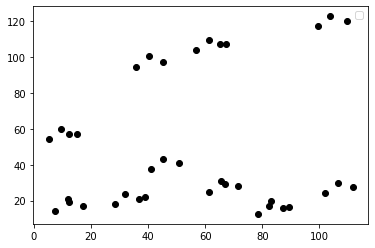

In [4]:
def find_local_maxima(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    # Find local maxima coordinates
    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((i, j))
    
    # Classify non-zero points based on their nearest local maxima
    groups = {}
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] != 0:
                min_distance = float('inf')
                nearest_maxima = None
                for x, y in local_maxima:
                    distance = abs(x - i) + abs(y - j)
                    if distance < min_distance:
                        min_distance = distance
                        nearest_maxima = (x, y)
                if nearest_maxima not in groups:
                    groups[nearest_maxima] = []
                groups[nearest_maxima].append((i, j, matrix[i][j]))  # Include the value of the point
    
    # Calculate the weighted average coordinates of each group
    result = []
    for key, points in groups.items():
        total_weight = sum(p[2] for p in points)
        if total_weight == 0:
            raise ValueError("Total weight cannot be zero")
        weighted_sum_x = sum(p[0] * p[2] for p in points)
        weighted_sum_y = sum(p[1] * p[2] for p in points)
        avg_coordinates = (weighted_sum_x / total_weight, weighted_sum_y / total_weight)
        result.append({"coordinates": points, "average": avg_coordinates})
    
    return result

# 示例矩阵
matrix = images[0].raw_image
# 查找局部最大值的坐标并分类非零点，然后计算每组的加权平均坐标
grouped_points = find_local_maxima(matrix)
print("每一类点的坐标及其加权平均坐标：", grouped_points)

plt.figure()
for group in grouped_points:
    avg_coordinates = group["average"]
    plt.scatter(*avg_coordinates,color='black')
plt.legend()
plt.show()